In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_excel("faltas_tratadas.xlsx")

Exercício 4 – Análise Descritiva Avançada

In [132]:
# a) Qual o número total de evasões por departamento?
evasoes_departamentos = df[df['Evadiu'] == 'Sim'].groupby('Departamento').size()
print(evasoes_departamentos)

Departamento
Financeiro    4
Marketing     6
Operações     4
RH            3
TI            1
Vendas        3
dtype: int64


In [133]:
# b) Qual é o percentual de evasão considerando apenas os que participaram do turno da tarde?
evasao_tarde_total = df[df['Turno'] == 'Tarde']
evasao_tarde_pct = (evasao_tarde_total['Evadiu'] == 'Sim').sum() / len(evasao_tarde_total) * 100
print(f'{evasao_tarde_pct:.2f} %')

8.85 %


In [134]:
# c) Qual é o desvio padrão de faltas por turno?
desvio_padrao_faltas = df.groupby('Turno')['Faltas'].std()
print(desvio_padrao_faltas)

Turno
Manhã    2.701585
Tarde    2.394486
Name: Faltas, dtype: float64


Exercício 5 – Análise Temporal

In [135]:
# a) Em qual mês ocorreu o maior número de faltas?
df['Mes_Ultima_Falta'] = df['Data_Ultima_Falta'].dt.month
maior_numero_faltas_mes = df.groupby('Mes_Ultima_Falta')['Faltas'].sum()
print(f'O Mês {maior_numero_faltas_mes.idxmax()} teve o maior número de faltas com {maior_numero_faltas_mes.max()} faltas' )

O Mês 1 teve o maior número de faltas com 193 faltas


In [136]:
# b) Crie uma coluna Semana_Ultima_Falta e descubra qual semana teve maior concentração de ausências.
df['Semana_Ultima_Falta'] = df['Data_Ultima_Falta'].dt.isocalendar().week
maior_numero_faltas_semana = df.groupby('Semana_Ultima_Falta')['Faltas'].sum()
print(f'A semana {maior_numero_faltas_semana.idxmax()} teve o maior número de faltas com {maior_numero_faltas_semana.max()} faltas')

A semana 12 teve o maior número de faltas com 76 faltas


In [137]:
# c) Faça uma análise cruzando dia da semana e quantidade de evasões.
evasoes_dia_semana = pd.crosstab(df['Dia_da_Semana_Ultima_Falta'], df['Evadiu'])
print(evasoes_dia_semana)

Evadiu                      Desconhecido  Não  Sim
Dia_da_Semana_Ultima_Falta                        
Quarta                                 1   27    7
Quinta                                 2   32    3
Segunda                                4   66    4
Sexta                                  2   33    3
Terça                                  4   27    4


Exercício 6 – Análise de Risco

In [138]:
# a) Crie a coluna Risco_Evasao com três categorias: Alto, Moderado, Baixo.
def classificar_risco(faltas):
    if faltas >= 7:
        return 'Alto'
    elif faltas >= 4:
        return 'Moderado'
    else:
        return 'Baixo'

df['Risco_Evasao'] = df['Faltas'].apply(classificar_risco)
print(df['Risco_Evasao'])

0       Alto
1      Baixo
2      Baixo
3      Baixo
4      Baixo
       ...  
214    Baixo
215    Baixo
216    Baixo
217    Baixo
218    Baixo
Name: Risco_Evasao, Length: 219, dtype: object


In [139]:
# b) Gere uma tabela com a distribuição percentual de risco por departamento.
distribuicao_percentual = evasoes_dia_semana = pd.crosstab(df['Departamento'], df['Risco_Evasao'], normalize='index') * 100
print(distribuicao_percentual)

Risco_Evasao      Alto      Baixo   Moderado
Departamento                                
Financeiro    5.714286  77.142857  17.142857
Marketing     7.317073  78.048780  14.634146
Operações     5.769231  80.769231  13.461538
RH            3.225806  87.096774   9.677419
TI            3.333333  80.000000  16.666667
Vendas        3.333333  76.666667  20.000000


In [140]:
# c) Há relação entre risco alto e turno da tarde?
relacao_risco_alto_tarde = df[(df['Risco_Evasao'] == 'Alto') & (df['Turno'] == 'Tarde')]
relacao = 'Não' if len(relacao_risco_alto_tarde) == 0 else 'Sim'
print(relacao)

Sim


Exercício 7 – Visualizações Estratégicas

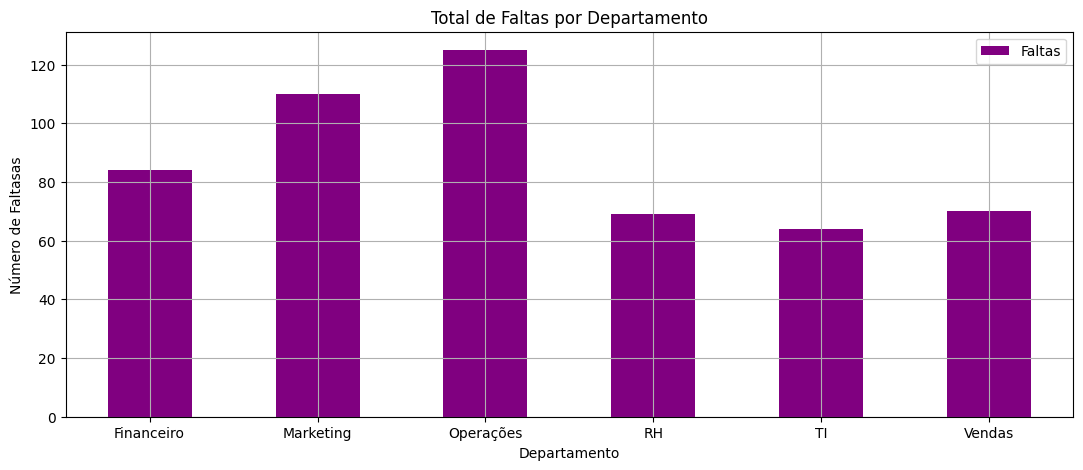

In [141]:
# a) Gráfico de barras: número de faltas por departamento.
plt.figure(figsize=(13,5))
numero_faltas_por_departamento = df.groupby('Departamento')['Faltas'].sum()
numero_faltas_por_departamento.plot(kind='bar', color='purple')

plt.title('Total de Faltas por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Número de Faltasas')


plt.grid(True)
plt.xticks(rotation=360)
plt.legend()

plt.show()

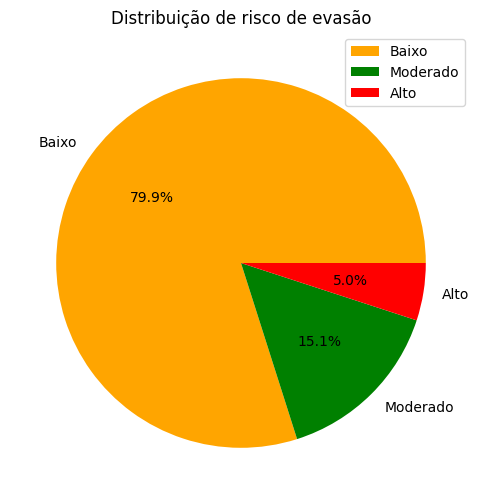

In [144]:
# b) Gráfico de pizza: distribuição de risco de evasão.
plt.figure(figsize=(6, 6))
distribuicao_risco_evasao = df['Risco_Evasao'].value_counts()
distribuicao_risco_evasao.plot(kind='pie', autopct='%1.1f%%', colors=['Orange', 'Green', 'Red'])

plt.title('Distribuição de risco de evasão')
plt.ylabel('')
plt.legend()

plt.show()

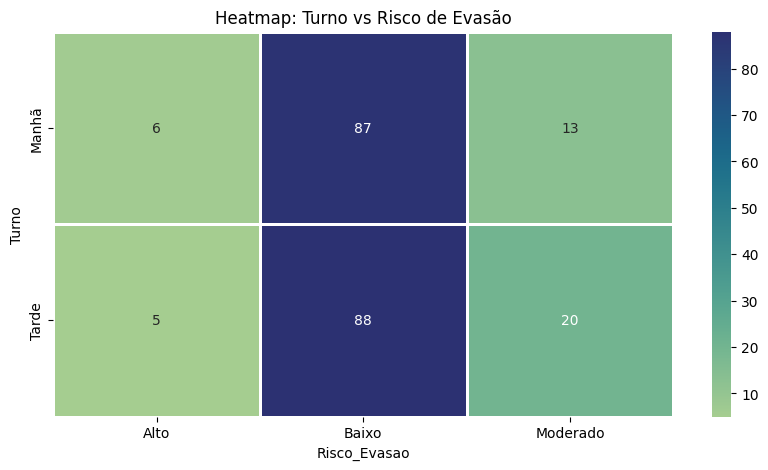

In [150]:
# c) Heatmap cruzando Turno e Risco_Evasao.
plt.figure(figsize=(10,5))
risco_evasao_por_turno = pd.crosstab(df['Turno'], df['Risco_Evasao'])
sb.heatmap(risco_evasao_por_turno, annot=True, linewidths=2.0, cmap="crest", fmt='d')
plt.title("Heatmap: Turno vs Risco de Evasão")
plt.show()